In [ ]:
!pip install bert-for-tf2

In [ ]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert
import plotly.express as px
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import spacy

In [ ]:
data = pd.read_csv('TrainingData.csv')
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


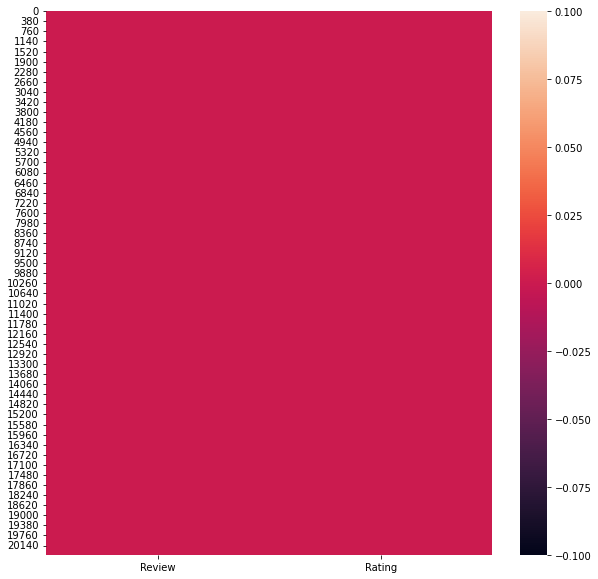

In [ ]:
sns.heatmap(data.isnull());

In [ ]:
temp = data.describe()
temp.style.background_gradient(cmap='Oranges')

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


(0.0, 9959.400000000001)

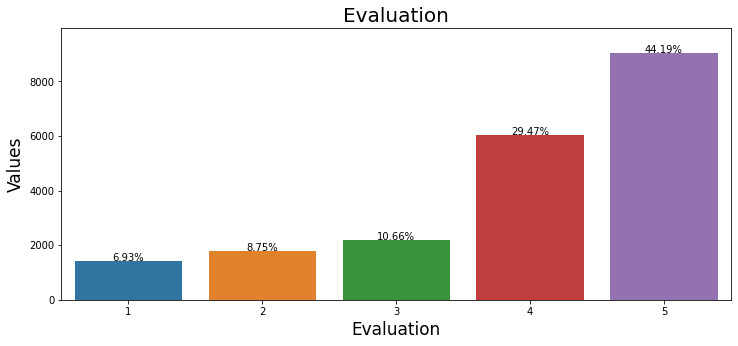

In [ ]:
total = len(data)
ax1 = plt.figure(figsize=(12,5))

g = sns.countplot(x='Rating', data=data)
g.set_title("Evaluation", fontsize=20)
g.set_xlabel("Evaluation", fontsize=17)
g.set_ylabel("Values", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1)

In [ ]:
data['Rating'] = data['Rating'].apply(lambda x: 1 if x >= 2 else 0) 

In [ ]:
positive = data[data['Rating'] == 1 ]
negative = data[data['Rating'] == 0]

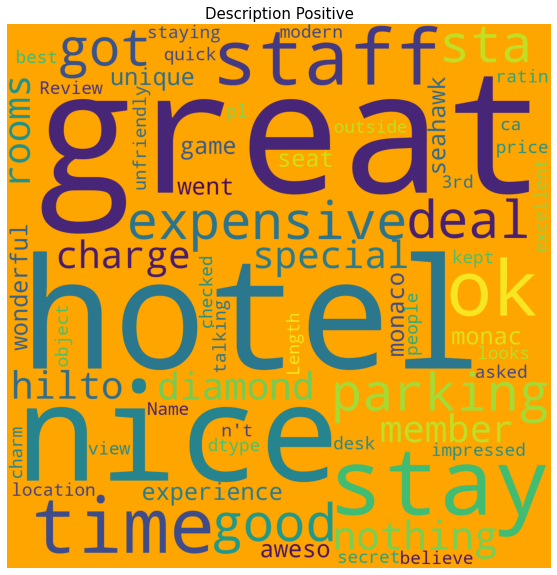

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(positive['Review']))
plt.title('Description Positive', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

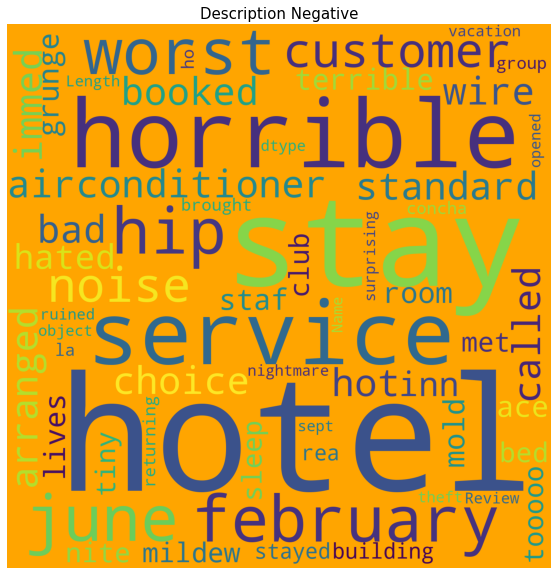

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(negative['Review']))
plt.title('Description Negative', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,1
2,nice rooms not 4* experience hotel monaco seat...,1
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1


In [ ]:
def clean_t(t):
  t = BeautifulSoup(t, 'lxml').get_text()
  t = re.sub(r"@[A-Za-z0-9]+", ' ', t)
  t = re.sub(r"https?://[A-Za-z0-9./]+", ' ', t)
  t = re.sub(r"[^a-zA-Z.!?]", ' ', t)
  t = re.sub(r" +", ' ', t)
  return t

In [ ]:
test = '99 ' + data.Review[0]
test

'99 nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [ ]:
result = clean_t(test)
result

' nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night '

In [ ]:
data_clean = [clean_t(t) for t in data.Review]

In [ ]:
data_clean[0:4]

['nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night ',
 'ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls sui

In [ ]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1', trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [ ]:
vocab_file

b'/tmp/tfhub_modules/88ac13afec2955fd14396e4582c251841b67429a/assets/vocab.txt'

In [ ]:
len(tokenizer.vocab)

30522

In [ ]:
tokenizer.tokenize('i love pop up phones.')

['i', 'love', 'pop', 'up', 'phones', '.']

In [ ]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize('i love pop up phones.'))

[1045, 2293, 3769, 2039, 11640, 1012]

In [ ]:
def encode_sentence(sent):
  return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sent))

In [ ]:
encode_sentence('i love pop up phones')

[1045, 2293, 3769, 2039, 11640]

In [ ]:
data_inputs = [encode_sentence(sentence) for sentence in data_clean]

In [ ]:
data_inputs[1]

[7929,
 2498,
 2569,
 3715,
 6323,
 2266,
 15481,
 2787,
 4677,
 2915,
 16215,
 5315,
 5862,
 2707,
 17414,
 7621,
 3825,
 4469,
 4037,
 6412,
 2025,
 7621,
 5010,
 5723,
 3115,
 3309,
 2282,
 2165,
 6267,
 11079,
 4624,
 3662,
 2056,
 2477,
 2066,
 2694,
 6411,
 14925,
 2102,
 4624,
 7805,
 2409,
 2821,
 3816,
 19796,
 6412,
 5035,
 15857,
 4037,
 3374,
 2489,
 6350,
 2288,
 12489,
 8408,
 11072,
 3564,
 2282,
 5723,
 5010,
 4406,
 5035,
 15857,
 4455,
 7621,
 2154,
 2994,
 3749,
 6149,
 6270,
 6475,
 4604,
 5035,
 15857,
 6871,
 4113,
 4037,
 10373,
 4851,
 4945,
 3073,
 7621,
 17099,
 4037,
 11079,
 6412,
 19851,
 2524,
 6100,
 11079,
 6140,
 5833,
 4037,
 4624,
 3208,
 4611,
 2106,
 2025,
 7514,
 5576,
 4604,
 10373,
 4440,
 4113,
 5002,
 2106,
 2025,
 3582,
 10373,
 5653,
 3984,
 2425,
 4986,
 4113,
 1012,
 1996,
 3095,
 15844,
 24436,
 2025,
 14044,
 2356,
 4624,
 2204,
 6350,
 7516,
 5101,
 7415,
 2409,
 2053,
 9275,
 20277,
 2190,
 6350,
 7516,
 5862,
 3796,
 2185,
 14057,
 330

In [ ]:
data_labels = data.iloc[:,1].values

In [ ]:
data_labels

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
data_with_len = [[sent, data_labels[i], len(sent)]
                 for i, sent in enumerate(data_inputs)]

In [ ]:
data_with_len[0:2]

[[[3835,
   3309,
   6450,
   5581,
   2288,
   2204,
   3066,
   2994,
   3309,
   5315,
   3369,
   2397,
   3944,
   2165,
   6040,
   3025,
   4391,
   2106,
   27238,
   5581,
   4638,
   4248,
   3733,
   2210,
   9364,
   2512,
   25953,
   3193,
   2282,
   2282,
   4550,
   3835,
   2946,
   2793,
   6625,
   8271,
   10551,
   3300,
   2152,
   17860,
   2025,
   2614,
   18907,
   2066,
   2657,
   2189,
   2282,
   2305,
   2851,
   5189,
   28490,
   4303,
   3098,
   5494,
   2963,
   2111,
   3331,
   6797,
   2672,
   2074,
   20810,
   10638,
   13642,
   2850,
   7198,
   3688,
   3835,
   2106,
   2025,
   2751,
   7529,
   2994,
   3835,
   3543,
   2579,
   5056,
   6595,
   2936,
   3295,
   2307,
   3788,
   3292,
   6023,
   3452,
   3835,
   3325,
   2383,
   3477,
   5581,
   2305],
  1,
  90],
 [[7929,
   2498,
   2569,
   3715,
   6323,
   2266,
   15481,
   2787,
   4677,
   2915,
   16215,
   5315,
   5862,
   2707,
   17414,
   7621,
   3825,
   4469,
   

In [ ]:
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
sorted_all = [(sent_lab[0], sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 7]

In [ ]:
sorted_all[3000:3005]

[([3309,
   2381,
   4370,
   3309,
   2146,
   2051,
   3283,
   3811,
   28667,
   9006,
   10497,
   4900,
   3309,
   2074,
   3191,
   10702,
   5202,
   2198,
   12234,
   2198,
   5308,
   1012,
   8308,
   16073,
   25981,
   2152,
   2504,
   14955,
   4183,
   23670,
   2266,
   3451,
   4329,
   2933,
   2075,
   6595,
   3191,
   2338,
   6904,
   28748,
   3436,
   4281],
  1),
 ([11706,
   3309,
   3413,
   3085,
   2025,
   2428,
   3643,
   2769,
   4734,
   4550,
   23613,
   19851,
   3621,
   2235,
   4770,
   2181,
   8403,
   2763,
   12944,
   1012,
   6350,
   28305,
   2204,
   2025,
   11813,
   9364,
   8915,
   23267,
   13501,
   6763,
   28477,
   5032,
   4840,
   1012,
   2035,
   7182,
   3994,
   3309,
   7597,
   2066,
   2210,
   2569],
  1),
 ([2672,
   2367,
   3309,
   1012,
   1012,
   6659,
   18151,
   3366,
   2282,
   21542,
   2785,
   12459,
   2053,
   9346,
   2694,
   7172,
   20810,
   1012,
   1012,
   2632,
   2305,
   15653,
   2545,


In [ ]:
all_dataset = tf.data.Dataset.from_generator(lambda: sorted_all,
                                             output_types = (tf.int32, tf.int32))

In [ ]:
next(iter(all_dataset))

(<tf.Tensor: shape=(8,), dtype=int32, numpy=array([3835, 3309, 3193, 2117, 2282, 2282, 2187, 5216], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>)

In [ ]:
BATCH_SIZE = 32
all_batched = all_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [ ]:
next(iter(all_batched))

(<tf.Tensor: shape=(32, 12), dtype=int32, numpy=
 array([[ 3835,  3309,  3193,  2117,  2282,  2282,  2187,  5216,     0,
             0,     0,     0],
        [ 3314,  1050,  1056,  2360,  2732,  2326,  2307,  4770,  3347,
             0,     0,     0],
        [11519,  2173,  2994,  3976,  2793,  2157,  5723,  4098,  4084,
             0,     0,     0],
        [ 2193,  3309,  2193,  5464,  3819,  2126,  2190,  6350,  2088,
             0,     0,     0],
        [ 5580,  4370,  2307,  3325,  2994,  2051,  4084, 14271, 10356,
             0,     0,     0],
        [ 2307,  2173,  2994,  3407,  2994,  5410,  7922,  2245,  2307,
          3643,     0,     0],
        [ 4669,  3295, 10382,  3288,  5116, 14057,  3835,  3095,  4550,
          3309,     0,     0],
        [ 2307,  3309,  3866,  3309,  3295,  3819,  3095,  2307,  5791,
          2994,     0,     0],
        [ 7729,  2293,  2686, 23775, 12726, 18772,  9467,  2307,  6891,
          7729,     0,     0],
        [ 6919,  2994,  

In [ ]:
len(sorted_all)

20490

In [ ]:
NB_BATCHES = len(sorted_all) // BATCH_SIZE
NB_BATCHES

640

In [ ]:
NB_BATCHES_TEST = NB_BATCHES // 10
NB_BATCHES_TEST

64

In [ ]:
all_batched.shuffle(NB_BATCHES)
test_dataset = all_batched.take(NB_BATCHES_TEST)
train_dataset = all_batched.skip(NB_BATCHES_TEST)

In [ ]:
next(iter(test_dataset))

(<tf.Tensor: shape=(32, 12), dtype=int32, numpy=
 array([[ 3835,  3309,  3193,  2117,  2282,  2282,  2187,  5216,     0,
             0,     0,     0],
        [ 3314,  1050,  1056,  2360,  2732,  2326,  2307,  4770,  3347,
             0,     0,     0],
        [11519,  2173,  2994,  3976,  2793,  2157,  5723,  4098,  4084,
             0,     0,     0],
        [ 2193,  3309,  2193,  5464,  3819,  2126,  2190,  6350,  2088,
             0,     0,     0],
        [ 5580,  4370,  2307,  3325,  2994,  2051,  4084, 14271, 10356,
             0,     0,     0],
        [ 2307,  2173,  2994,  3407,  2994,  5410,  7922,  2245,  2307,
          3643,     0,     0],
        [ 4669,  3295, 10382,  3288,  5116, 14057,  3835,  3095,  4550,
          3309,     0,     0],
        [ 2307,  3309,  3866,  3309,  3295,  3819,  3095,  2307,  5791,
          2994,     0,     0],
        [ 7729,  2293,  2686, 23775, 12726, 18772,  9467,  2307,  6891,
          7729,     0,     0],
        [ 6919,  2994,  

In [ ]:
next(iter(train_dataset))

(<tf.Tensor: shape=(32, 36), dtype=int32, numpy=
 array([[ 2283,  2814, 13366, ..., 13366,  2173,  2814],
        [ 3835,  2715,  3309, ...,  4274,  3976,  2152],
        [ 2502,  7001,  2564, ...,  7167,  7139,  7523],
        ...,
        [17070, 12098,  3630, ...,  2395, 27486, 11673],
        [ 2307,  3309,  3309, ...,  4770,  3835,  3309],
        [16755,  3811, 16222, ...,  3517,  3811,  6749]], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)>)

In [ ]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters = 50,
               FFN_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=False,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 2,
                                padding='valid',
                                activation='relu')
    self.trigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 3,
                                padding='valid',
                                activation='relu')
    self.fourgram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 4,
                                padding='valid',
                                activation='relu')
    
    self.pool = layers.GlobalMaxPool1D()

    self.dense_1 = layers.Dense(units = FFN_units, activation='relu')
    self.dropout = layers.Dropout(rate=dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units=1, activation='sigmoid')
    else:
      self.last_dense = layers.Dense(units=nb_classes, activation='softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

In [ ]:
VOCAB_SIZE = len(tokenizer.vocab)
EMB_DIM = 200
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 12

In [ ]:
Dcnn = DCNN(vocab_size=VOCAB_SIZE,
            emb_dim=EMB_DIM,
            nb_filters = NB_FILTERS,
            FFN_units = FFN_UNITS,
            nb_classes = NB_CLASSES,
            dropout_rate = DROPOUT_RATE)

In [ ]:
if NB_CLASSES == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [ ]:
history = Dcnn.fit(train_dataset,
                   epochs=NB_EPOCHS)

Epoch 1/12
577/577 [==============================] - 125s 212ms/step - loss: 0.1542 - accuracy: 0.9390
Epoch 2/12
577/577 [==============================] - 119s 206ms/step - loss: 0.0597 - accuracy: 0.9756
Epoch 3/12
577/577 [==============================] - 116s 200ms/step - loss: 0.0154 - accuracy: 0.9952
Epoch 4/12
577/577 [==============================] - 116s 201ms/step - loss: 0.0036 - accuracy: 0.9989
Epoch 5/12
577/577 [==============================] - 117s 202ms/step - loss: 5.1815e-04 - accuracy: 0.9999
Epoch 6/12
577/577 [==============================] - 117s 202ms/step - loss: 1.1510e-04 - accuracy: 1.0000
Epoch 7/12
577/577 [==============================] - 120s 208ms/step - loss: 5.3309e-05 - accuracy: 1.0000
Epoch 8/12
577/577 [==============================] - 120s 208ms/step - loss: 3.3219e-05 - accuracy: 1.0000
Epoch 9/12
577/577 [==============================] - 120s 207ms/step - loss: 1.9451e-05 - accuracy: 1.0000
Epoch 10/12
577/577 [=======================

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

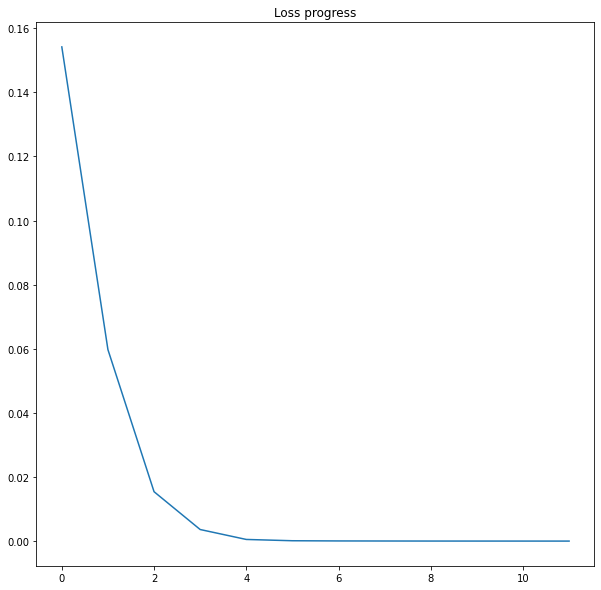

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss progress');

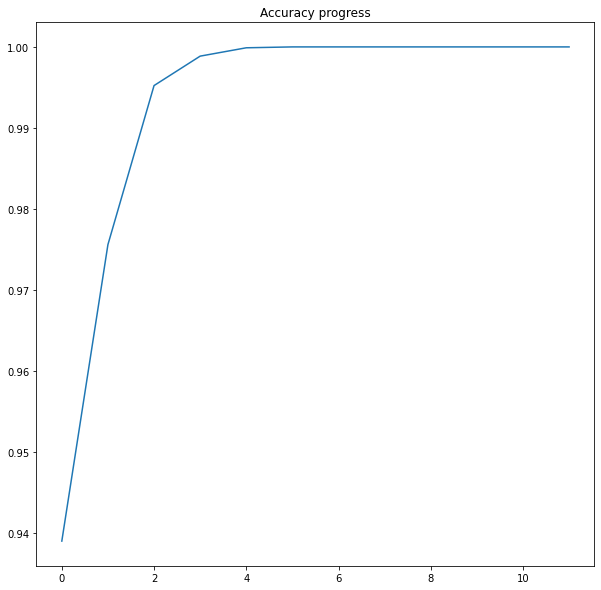

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy progress');

In [ ]:
results = Dcnn.evaluate(test_dataset)
print(results)

64/64 [==============================] - 2s 24ms/step - loss: 0.1962 - accuracy: 0.9688
[0.19622887670993805, 0.96875]


In [ ]:
def get_prediction(sentence):
  tokens = encode_sentence(sentence)
  inputs = tf.expand_dims(tokens, 0)
  output = Dcnn(inputs, training=False)
  sentiment = output

  if sentiment<0.89:
    return(1)
  elif 0.89<=sentiment<0.92:
    return(2)
  elif 0.92<=sentiment<0.96:
    return(3)
  elif 0.96<=sentiment<0.98:
    return(4)
  elif sentiment>=0.98:
    return(5)

In [ ]:
print(get_prediction('This perfume is good'))

3


In [ ]:
print(get_prediction('This mobile has a decent storage capacity'))

5


In [ ]:
print(get_prediction('This has bad screen quality but good phone'))

5


In [ ]:
print(get_prediction('i did not like this product'))

1


In [ ]:
print(get_prediction("this is really worst most"))

1


In [ ]:
print(get_prediction("best divice"))

5


In [ ]:
df1 = pd.read_csv("TestData.csv")
 
print(df1)

                                               Review
0                              This is a good product
1                                    It don't like it
2   this product will be more usable if This is pr...
3                                  this phone is bad.
4   This is camera is good but This is processor i...
5     it has a good power storage but lacks the speed
6   I used this divice for gaming but it become to...
7                    This is does not worth the price
8   we should rather support indian brands more th...
9      This is a good product with good battery power
10                                  This is worst one
11                       This is really a bad product
12                  This is good product and nice too
13                                 This very good one
14                   This is best product I ever used
15                                 This is a good one
16                                  This is bad phone
17               This is bad

In [ ]:
df1["Rating"]=df1['Review'].apply(lambda x:get_prediction(x))


In [ ]:
df1

,Review,Rating
0,This is a good product,5
1,It don't like it,1
2,this product will be more usable if This is pr...,5
3,this phone is bad.,1
4,This is camera is good but This is processor i...,5
5,it has a good power storage but lacks the speed,5
6,I used this divice for gaming but it become to...,5
7,This is does not worth the price,1
8,we should rather support indian brands more th...,5
9,This is a good product with good battery power,5


In [ ]:
print("Rate of the Product: ",round(df1['Rating'].mean()))

Rate of the Product:  3
